Wahlpflichtfach Künstliche Intelligenz II: Praktikum 

---

# 05 - Ensembles Learning mit Tensorflow

Nachdem wir uns angesehen haben, wie wir das Ergebnis durch die Optimierung der Hyperparameter verbessern versuchen wir das nun durch Ensemble learning.  

In [1]:
import tensorflow as tf

2024-01-13 23:21:17.867096: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-13 23:21:17.868287: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-13 23:21:17.886112: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 23:21:17.886137: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 23:21:17.886150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
%matplotlib inline

In [3]:
print(tf.__version__)

2.14.0


## Erstellen eines kleinen klassifikationsdaten

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

iris = datasets.load_iris()
y = to_categorical(iris.target)
x = iris.data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Ensembles

Bei einem Ensemble handelt es sich um einen Zusammenschluss mehrerer KI-Modelle. Hierbei gibt es zum Beispiel die Möglichkeit, die den durchschnitt oder das Maximum der unterschiedlichen Modelle zu nehmen. Diese können dabei auch beliebig tief geschachtelt werden.

In [5]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy, Recall, Precision

model_1 = Sequential(name="classification_mlp1")
model_1.add(Dense(8, activation='relu', input_dim=4))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

model_1.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(), Recall(), Precision()]
)

model_1.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    epochs=5,
)
loss, acc, rec, prec = model_1.evaluate(x_test, y_test)
tf.keras.backend.clear_session()

2024-01-13 23:21:19.357796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-13 23:21:19.357964: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
3/3 [==============================] - 1s 65ms/step - loss: 1.4294 - categorical_accuracy: 0.3571 - recall: 0.3214 - precision: 0.3506 - val_loss: 1.0785 - val_categorical_accuracy: 0.3333 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 0s 9ms/step - loss: 1.1147 - categorical_accuracy: 0.3452 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1005 - val_categorical_accuracy: 0.4762 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 0s 9ms/step - loss: 1.1539 - categorical_accuracy: 0.3214 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0871 - val_categorical_accuracy: 0.4762 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/5
3/3 [==============================] - 0s 9ms/step - loss: 1.1152 - categorical_accuracy: 0.3214 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0562 - val_categorical_accuracy: 0.4762 - val_recall: 0.0000e+00

In [6]:
model_2 = Sequential(name="classification_mlp2")
model_2.add(Dense(16, activation='relu', input_dim=4))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(3, activation='softmax'))

model_2.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(), Recall(), Precision()]
)

model_2.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    epochs=5,
)
loss, acc, rec, prec = model_2.evaluate(x_test, y_test)
tf.keras.backend.clear_session()

Epoch 1/5
3/3 [==============================] - 0s 58ms/step - loss: 1.0484 - categorical_accuracy: 0.5476 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9993 - val_categorical_accuracy: 0.3333 - val_recall: 0.3333 - val_precision: 0.5833
Epoch 2/5
3/3 [==============================] - 0s 9ms/step - loss: 1.0083 - categorical_accuracy: 0.3690 - recall: 0.3214 - precision: 0.5870 - val_loss: 0.8671 - val_categorical_accuracy: 0.7143 - val_recall: 0.0952 - val_precision: 0.6667
Epoch 3/5
3/3 [==============================] - 0s 9ms/step - loss: 0.9251 - categorical_accuracy: 0.4643 - recall: 0.2024 - precision: 0.9444 - val_loss: 0.7921 - val_categorical_accuracy: 0.5714 - val_recall: 0.4762 - val_precision: 1.0000
Epoch 4/5
3/3 [==============================] - 0s 9ms/step - loss: 0.8758 - categorical_accuracy: 0.6310 - recall: 0.3214 - precision: 0.7941 - val_loss: 0.7313 - val_categorical_accuracy: 0.8095 - val_recall: 0.6667 - val_precision: 0.9333
Epoch 5/5
2/2 [====

**Average Ensemble**

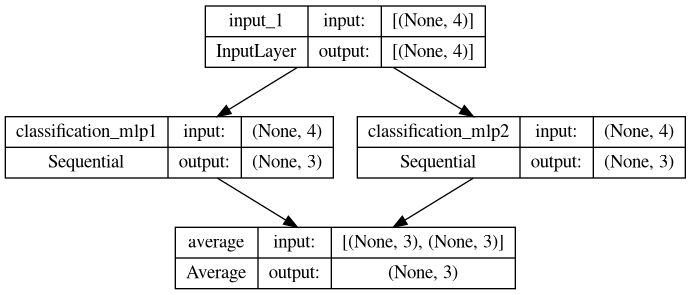

In [7]:
from keras.layers import Input, Average, Maximum
from keras.models import Model
from keras.utils import plot_model

models = [model_1, model_2]

model_input = Input(shape=(4,))
single_mlp_outputs = [model(model_input) for model in models]
ensemble_output = Average()([
    model(model_input)
    for model in models
])
ensemble_model_avg = Model(inputs=model_input, outputs=ensemble_output)
plot_model(ensemble_model_avg, show_shapes=True, show_dtype=False, show_layer_names=True,
           show_layer_activations=True)

In [8]:
ensemble_model_avg.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(), Recall(), Precision()]
)
loss, acc, rec, prec = ensemble_model_avg.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.9391 - categorical_accuracy: 0.4889 - recall: 0.0000e+00 - precision: 0.0000e+00


**Maximum Ensemble**

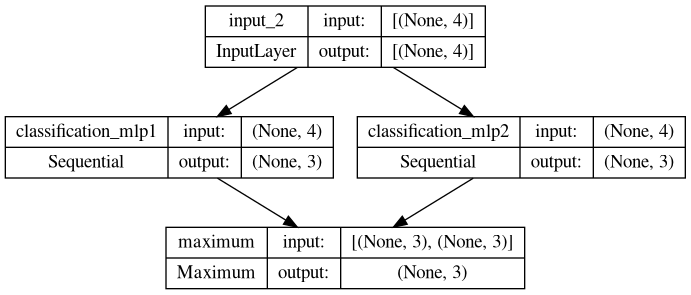

In [9]:
model_input = Input(shape=(4,))
single_mlp_outputs = [model(model_input) for model in models]
ensemble_output = Maximum()([
    model(model_input)
    for model in models
])
ensemble_model_max = Model(inputs=model_input, outputs=ensemble_output)
plot_model(ensemble_model_max, show_shapes=True, show_dtype=False, show_layer_names=True,
           show_layer_activations=True)

In [10]:
ensemble_model_max.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(), Recall(), Precision()]
)
loss, acc, rec, prec = ensemble_model_max.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.9574 - categorical_accuracy: 0.5778 - recall_1: 0.4444 - precision_1: 0.9524


**Majority Voting Ensemble**

In [21]:
from keras.src.layers.merging.base_merge import _Merge

class MajorityVoting(_Merge):
    def _clean(self, t: tf.Tensor):
        top, _ = tf.math.top_k(t, 1)
        return tf.cast(tf.equal(t, top), dtype=tf.float32)

    def _merge_function(self, inputs: list[tf.Tensor]):
        output = self._clean(inputs[0])
        for i in range(1, len(inputs)):
            output = tf.add(output, self._clean(inputs[i]))
        return tf.divide(output, len(inputs))

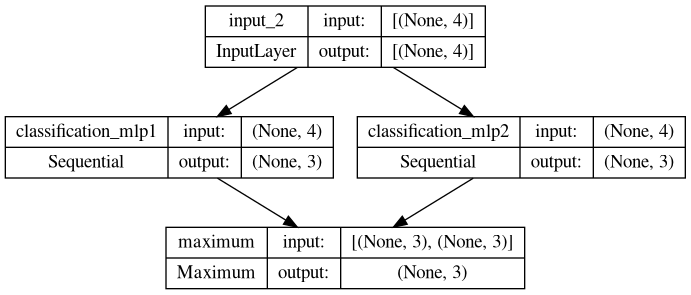

In [22]:
model_input = Input(shape=(4,))
single_mlp_outputs = [model(model_input) for model in models]
ensemble_output = MajorityVoting()([
    model(model_input)
    for model in models
])
ensemble_model_voting = Model(inputs=model_input, outputs=ensemble_output)
plot_model(ensemble_model_max, show_shapes=True, show_dtype=False, show_layer_names=True,
           show_layer_activations=True)

In [23]:
ensemble_model_voting.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(), Recall(), Precision()]
)
loss, acc, rec, prec = ensemble_model_voting.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 5.2918 - categorical_accuracy: 0.4222 - recall_2: 0.2889 - precision_2: 0.9286


---

Wahlpflichtach Künstliche Intelligenz II: Praktikum 